In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df=pd.read_csv('Mall_Customers.csv')
print(df.head())
df.info()

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
X=df.iloc[:,[3,4]].values

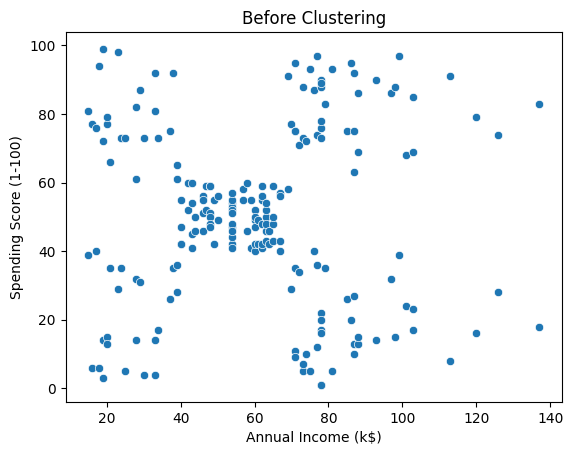

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
plt.Figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.title('Before Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [14]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [15]:
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(X_scaled)

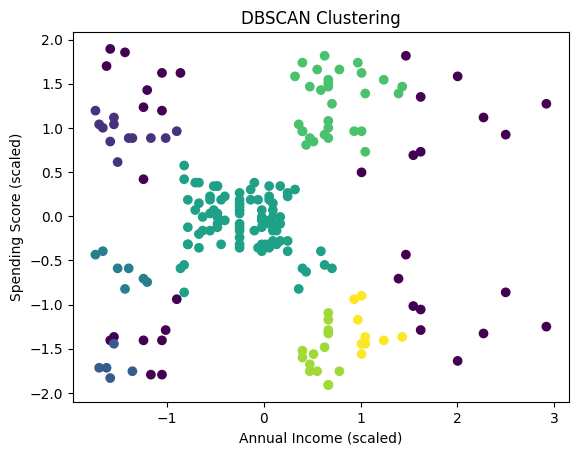

In [16]:
plt.Figure(figsize=(7,5))
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


In [17]:
# find silhouette score
from sklearn.metrics import silhouette_score
score=silhouette_score(X_scaled,clusters)
print('Silhouette Score:',score)

Silhouette Score: 0.31614121976731185


In [18]:
eps_values=[0.2,0.3,0.5]
for eps in eps_values:
    print(f'Evaluating DBSCAN with eps={eps}')
    # Apply DBSCAN with the current eps value
    dbscan=DBSCAN(eps=eps,min_samples=5)
    labels=dbscan.fit_predict(X_scaled)
    # Number of unique clusters (excluding noise)
    uniqe_labels=set(labels)
    n_clusters=len(uniqe_labels)- (1 if -1 in uniqe_labels else 0)
    # Number of noise points
    n_noise=list(labels).count(-1)
    noise_ratio=n_noise/len(X_scaled)
    print(f'Number of clusters: {n_clusters}, Noise points: {n_noise}, Noise ratio: {noise_ratio:.2f}')
    # Silhouette Score (only if valid clusters are found)
    if n_clusters > 1:
        score=silhouette_score(X_scaled,labels)
        print(f'Silhouette Score: {score:.2f}')
    else:
        print('Silhouette Score: Not applicable (only one cluster found)')

Evaluating DBSCAN with eps=0.2
Number of clusters: 7, Noise points: 77, Noise ratio: 0.39
Silhouette Score: 0.14
Evaluating DBSCAN with eps=0.3
Number of clusters: 7, Noise points: 35, Noise ratio: 0.17
Silhouette Score: 0.32
Evaluating DBSCAN with eps=0.5
Number of clusters: 2, Noise points: 8, Noise ratio: 0.04
Silhouette Score: 0.35
